<a href="https://colab.research.google.com/github/gleblo/msu_science_work/blob/dev/error%20found.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b dev https://github.com/gleblo/msu_science_work/
import msu_science_work.mnist_handling as mn

fatal: destination path 'msu_science_work' already exists and is not an empty directory.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import xavier_initializer
import tensorflow as tf
# import mnist_handling as mn

tf.set_random_seed(66666)

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

xs = tf.placeholder(tf.float32, [None, 784])
xx = tf.placeholder(tf.float32, [1, None, None, 1])
ys = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


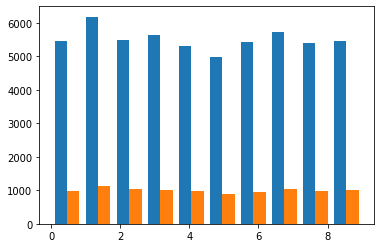

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist((np.argmax(mnist.train.labels,axis = 1),np.argmax(mnist.test.labels,axis = 1)))
plt.show()

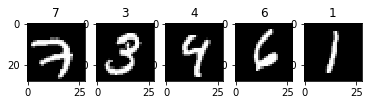

In [4]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.squeeze(np.reshape(mnist.train.images[i], newshape=[28,28])), cmap='gray')
  plt.title(np.argmax(mnist.train.labels[i],axis = 0))
plt.show()

In [0]:
def conv_net(data):
  # print(data.get_shape())
  # input = tf.reshape(data, [-1, 28, 28, 1])
  # print("hello mr sandman", tf.shape(data))
  
  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=data,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #2
  conv2 = tf.layers.conv2d(
      inputs=conv1,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  pool1 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Convolutional Layer #3
  conv3 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #4
  conv4 = tf.layers.conv2d(
      inputs=conv3,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #5
  conv5 = tf.layers.conv2d(
      inputs=conv4,
      filters=128,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #6
  conv6 = tf.layers.conv2d(
      inputs=conv5,
      filters=10,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # pool2 = tf.layers.max_pooling2d(inputs=conv6, pool_size=[4, 4], strides=4)
  pool2 = tf.reduce_max(input_tensor = conv6, axis = [1,2])

  flat = tf.reshape(pool2, [-1, 10])

  # prediction
  predictions = tf.nn.softmax(flat)
  return predictions

###Простой этап

In [6]:
easy_predictions = conv_net(mn.tf_shaper(xs))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(predictions), reduction_indices=[1]))
easy_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=easy_predictions, labels=ys)

easy_train_step = tf.train.AdamOptimizer(0.001).minimize(easy_cross_entropy)

# compute the accuracy
easy_correct_predictions = tf.equal(tf.argmax(easy_predictions, 1), tf.argmax(ys, 1))

easy_accuracy = tf.reduce_mean(tf.cast(easy_correct_predictions, tf.float32))


pred = conv_net(xx) 
fin = tf.argmax(pred, 1)

# fin = tf.cast(res, tf.float32)


tmp = 0
easy_loss_log = []

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


### Сложный этап

In [0]:
predictions = conv_net(mn.tf_complicater(xs))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(predictions), reduction_indices=[1]))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=ys)

train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

# compute the accuracy
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(ys, 1))

accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))



# fin = tf.cast(res, tf.float32)


tmp = 0
loss_log = []

In [0]:
import os
import random

dir_name = "msu-science-work/размеченное"
lst = os.listdir(dir_name)

test_list = ["msu-science-work/размеченное/" + name for name in lst]
# random.shuffle(test_list)

In [0]:
test_list.append('msu-science-work/размеченное/img_10.jpg')

In [0]:
# from google.colab.patches import cv2_imshow
# cv2_imshow("0_00417.jpg")

In [54]:
import time
import cv2
from google.colab.patches import cv2_imshow
t = time.clock()

saver = tf.train.Saver()

sess =  tf.Session()

init = tf.global_variables_initializer()
sess.run(init)
saver.save(sess, 'my_test_model')
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(256)
    batch_xs = batch_xs
    los = sess.run(cross_entropy, feed_dict={xs: batch_xs, ys: batch_ys})
    loss_log.append(los)

    sess.run(easy_train_step, feed_dict={xs: batch_xs, ys: batch_ys})

    if (i + 1) % 100 == 0:
        answers = []
        ansis = []        
        acc = sess.run(easy_accuracy, feed_dict={
            xs: mnist.test.images,
            ys: mnist.test.labels
        })
        print("steps : %d " % (i + 1), "accuracy: ", acc, "time: ", time.clock() - t, "  ", time.clock())
        #my accuracy
        # ansis
        for im in mnist.test.images:
            new_image = (np.reshape(im, (28,28)))[np.newaxis,:,:,np.newaxis]
            aa = sess.run(fin, feed_dict={xx: new_image})
            ansis.append(aa[0])
        print(np.mean(np.equal(ansis, np.argmax(mnist.test.labels,1))))
        t = time.clock()
        # random.shuffle(test_list)
        for img in test_list:
            image = cv2.imread(img)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            new_image = (1 - gray.copy()/255)[np.newaxis,:,:,np.newaxis]
            # print(new_image)
            # print(new_image.shape)
            # plt.imshow(np.squeeze(new_image), cmap='gray')
            # plt.show()    
            aa = sess.run(fin, feed_dict={xx: new_image})
            # print(aa)
            answers.append(aa[0])

        print(answers)














print("Started hard phase:")
print()
print()
for i in range(30000):
    batch_xs, batch_ys = mnist.train.next_batch(256)
    batch_xs = batch_xs
    los = sess.run(cross_entropy, feed_dict={xs: batch_xs, ys: batch_ys})
    loss_log.append(los)

    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})

    if (i + 1) % 100 == 0:
        answers = []        
        acc = sess.run(accuracy, feed_dict={
            xs: mnist.test.images,
            ys: mnist.test.labels
        })
        print("steps : %d " % (i + 1), "accuracy: ", acc, "time: ", time.clock() - t, "  ", time.clock())
        t = time.clock()
        random.shuffle(test_list)
        for img in test_list:
            image = cv2.imread(img)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            new_image = (gray.copy()/255)[np.newaxis,:,:,np.newaxis]
            # print(new_image)
            # print(new_image.shape)
            # plt.imshow(np.squeeze(new_image), cmap='gray')
            # plt.show()    
            aa = sess.run(fin, feed_dict={xx: new_image})
            # print(aa)
            answers.append(aa[0])

        print(answers)
    # if acc > 0.98:
        
        # break
    

steps : 100  accuracy:  0.724 time:  1.778605999999968    1007.609131
0.102
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
steps : 200  accuracy:  0.7635 time:  1.42622300000005    1022.304476
0.102
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
steps : 300  accuracy:  0.7798 time:  1.4182240000000093    1037.133883
0.102
[4, 4, 4, 4, 4, 4, 4, 4,

KeyboardInterrupt: ignored

In [13]:
from google.colab.patches import cv2_imshow
cv2_imshow('msu-science-work/размеченное/img_10.jpg')

AttributeError: ignored

In [29]:
mnist.train.images[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
image = cv2.imread('msu-science-work/размеченное/img_10.jpg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.transpose((mnist.train.images[5]).reshape((28,28)))
new_image = (gray)[np.newaxis,:,:,np.newaxis]
sess.run(fin, feed_dict={xx: new_image})

array([4])

In [32]:
cv2_imshow(mnist.train.labels[10])

IndexError: ignored

In [16]:
print(new_image)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00784314]
   [0.02745098]
   [0.        ]
   [0.        ]
   [0.03137255]
   [0.        ]
   [0.        ]
   [0.00784314]
   [0.        ]
   [0.03529412]
   [0.        ]
   [0.        ]
   [0.01176471]
   [0.        ]
   [0.01960784]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.01568627]
   [0.02352941]
   [0.02352941]
   [0.        ]
   [0.01960784]
   [0.06666667]
   [0.        ]
   [0.        ]
   [0.02745098]
   [0.        ]
   [0.01960784]
   [0.03529412]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

In [0]:
plt.plot([a.mean() for a in loss_log])
plt.show()

#Остальное

In [0]:
import cv2
from google.colab.patches import cv2_imshow
im = cv2.imread("image.png")

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
3
ret, im_th = cv2.threshold(im_gray, 170, 255, cv2.THRESH_BINARY_INV)

ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


cv2_imshow(im_th)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
i = 0
for rect in rects:
    i= i+1
    # Draw the rectangles
    # cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im[pt1:pt1+leng, pt2:pt2+leng]
    # cv2_imshow(roi)
    cv2.imwrite(format(leng, '05d') +"_" + format(i, '05d') + ".jpg" ,img = roi)
cv2_imshow(im)
# cv2.waitKey(0)

In [0]:
import os

dir_name = "/content/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".jpg"):
        os.remove(os.path.join(dir_name, item))

In [0]:

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [0]:
!zip -r /content/file.zip /content

In [0]:
from google.colab import files
files.download("/content/file.zip")
# os.remove("/content/", "file.zip")

In [0]:
import os
os.remove("/content/file.zip")

In [0]:
import numpy as np
a = np.zeros(shape = (2,3))

In [0]:
d = (1 - gray/255).reshape((-1))
# d = batch_xs[0]

In [0]:
import seaborn as sns
sns.distplot(d)

In [0]:
print(gray[10:20,15:25])

In [0]:
cv2_imshow(gray)